This second practical work, on motion estimation, deals with parametric motion estimation. You have to reuse some of the functions you implemented during the first practical work.

You are asked to complete the different algorithms and to try it. Also, please answer to the theoretical questions, in the notebook.

In [29]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import gaussian_filter
from scipy.interpolate import griddata
from scipy.signal import convolve2d
from cv2 import copyMakeBorder,BORDER_REPLICATE

# Parametric estimation
In this second practical work, we will work on parametric estimation, both using direct and indirect methods.
## I- Direct parametric estimation
## I-1 Theoretical questions

**Infinite signal**

Let $a: (n,m)\in \mathbb{Z}^2 \rightarrow \mathbb{R}$ be a bi-dimensional signal and $b(n,m)$ a signal of the same type.

Recall the expression of the 2D discrete time Fourier transform (DTFT).




Let us suppose that
$\exists c,d \in \mathbb{Z}^2: \forall n,m \in \mathbb{Z}^2,b(n,m) = a(n+c,m+d)$ (that is, $b$ is a translation of $a$). Compute the DTFT of $b$ as a function of the one of $a$ and of the displacement $(c,d)$.

Show that the ratio between the DTFTs is:
$$
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \exp(i2\pi (c\nu_x + d \nu_y))
$$

**Finite signal**

Now, $a: (n,m) \in \{0,1,...,N-1\}^2 \rightarrow \mathbb{R}$ and $b(n,m)$ are both finite signals. In that case, we use the Discrete Fourier Transform (DFT) rather than the DTFT.

Recall the expression of the DFT.

Under which hypotheses is the ratio between $a$'s and $b$'s DFT a linear phase signal:
$$
\frac{\hat{A}(k_x,k_y)}{\hat{B}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N}\right)
$$

# Answers:
**Infinite signal**
### Answer 1:
Expression of the 2D discrete time Fourier transform (DTFT):

$$
\hat{x}(\nu_x, \nu_y) = \sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} x(n,m) e^{- i 2 \pi \nu_x n} e^{- i 2 \pi \nu_y m}
$$

### Answer 2: DTFT of $b$

Let's suppose that there exist $c, d \in \mathbb{Z}^2$ such that for all $n, m \in \mathbb{Z}^2$, $b(n,m) = a(n+c,m+d)$, where $b$ is a translation of $a$.

We have that the DTFT of $b$ is:

$$
\hat{b}(\nu_x, \nu_y) = \sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} b(n,m) e^{- i 2 \pi \nu_x n} e^{- i 2 \pi \nu_y m} 
= \sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} a(n+c,m+d) e^{- i 2 \pi \nu_x n} e^{- i 2 \pi \nu_y m} 
$$

Doing a change of variables:

$$
u = n+c, \,\, v = m+d
$$

$$
\hat{b}(\nu_x, \nu_y) = \sum_{u=-\infty}^{\infty} \sum_{v=-\infty}^{\infty} a(u,v) e^{- i 2 \pi \nu_x (u-c)} e^{- i 2 \pi \nu_y (v-d)} \\
= \sum_{u=-\infty}^{\infty} \sum_{v=-\infty}^{\infty} a(u,v) e^{- i 2 \pi \nu_x u} e^{- i 2 \pi \nu_y v} e^{i 2 \pi \nu_x c} e^{i 2 \pi \nu_y d} = \hat{a}(\nu_x, \nu_y) e^{i 2 \pi \nu_x c} e^{i 2 \pi \nu_y d} 
$$

$$
\to \hat{b}(\nu_x, \nu_y) = \hat{a}(\nu_x, \nu_y) e^{i 2 \pi (\nu_x c + \nu_y d)} 
$$

This expression shows how the DTFT of $b$ is related to the DTFT of $a$ and the displacement $(c, d)$.

### Answer 3: demonstration

Since 

$$
\hat{b}(\nu_x, \nu_y) = \hat{a}(\nu_x, \nu_y) e^{i 2 \pi (\nu_x c + \nu_y d)} 
$$

then
$$
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \frac{\hat{a}(\nu_x, \nu_y) e^{i 2 \pi (\nu_x c + \nu_y d)}}{\hat{a}(\nu_x, \nu_y)}
$$

$$
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \exp(i2\pi (c\nu_x + d \nu_y))
$$

This concludes the proof.

**Finite signal**

### Answer 4

DFT expression:
$$
\hat{X}(k_x, k_y) = \sum_{n=0}^{N-1} \sum_{m=0}^{N-1} x(n,m) e^{i 2 \pi \frac{k_x}{N} n} e^{i 2 \pi \frac{k_y}{N} m}
$$

### Answer 5: Hypotheses and demonstration

The ratio between the DFTs of \(a\) and \(b\) is a linear phase signal under the following hypotheses:

**Finite Signals**: Both \(a\) and \(b\) are finite signals, meaning they have finite lengths and are defined only for indices \(n, m\) in a finite range.

**Displacement Property**: \(b\) is a translated version of \(a\) by a displacement \((c, d)\). Mathematically, this is expressed as \(b[n, m] = a[n+c, m+d]\).

**Finite Support**: Both \(a\) and \(b\) have finite spatial support. This implies that \(a\) and \(b\) are zero outside of a finite range of indices.

**Periodicity of the DFT**: The DFT is inherently periodic in nature, with period \(N\) where \(N\) is the length of the sequence being transformed.

Under these hypotheses, the ratio of the DFTs of \(a\) and \(b\) takes on the form of a linear phase signal, meaning it can be expressed as an exponential function of the form $ e^{j\phi} $ where  $ \phi $ is linear in $ k_x $ and $ k_y $. The linear phase term in the exponent is $ \frac{2i\pi(ck_x + dk_y)}{N} $, where \(N\) is the length of the signals.

This linear phase term arises due to the translation property of the DFT. When a signal is translated in the spatial domain, it leads to phase shifts in the frequency domain, resulting in the linear phase term observed in the ratio of the DFTs.

To demonstrate that the ratio between the DFTs of $a$ and $b$ is a linear phase signal under the given hypotheses, we start with the expressions for the DFTs of $a$ and $b$.

$$
\hat{B}(k_x, k_y) = \sum_{n=0}^{N-1} \sum_{m=0}^{N-1} b(n,m) e^{i 2 \pi \frac{k_x}{N} n} e^{i 2 \pi \frac{k_y}{N} m} = 
\sum_{n=0}^{N-1} \sum_{m=0}^{N-1} a(n+c,m+d) e^{i 2 \pi \frac{k_x}{N} n} e^{i 2 \pi \frac{k_y}{N} m} \\ = 
\sum_{u=0}^{N-1} \sum_{v=0}^{N-1} a(u,v) e^{i 2 \pi \frac{k_x}{N} (u-c)} e^{i 2 \pi \frac{k_y}{N} (v-d)} \\ =
\hat{A}(k_x, k_y) e^{- i 2 \pi \frac{k_x}{N} c} e^{- i 2 \pi \frac{k_y}{N} d} 
$$

So:

$$
\hat{B}(k_x, k_y) = \hat{A}(k_x, k_y) \exp\left(- \frac{2i\pi(ck_x + dk_y)}{N}\right)
$$

This concludes the demonstration that the ratio between the DFTs of $a$ and $b$ is a linear phase signal, assuming that $a$ and $b$ are $N$ periodic in both dimensions.


## I-2 Practical part
First, start to work on the 'ball.mat' image. We will apply a translation to this image and try to estimate the parameter of the translation.

Try by either adding or not some noise into the image.

In [30]:
im1 = loadmat('ball.mat')['im1']
im1 = im1.astype('float')

#im1 = loadmat('lena.mat')['im1']
#im1 = im1.astype('float')

N, M = np.shape(im1)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x18ff965fd30>)

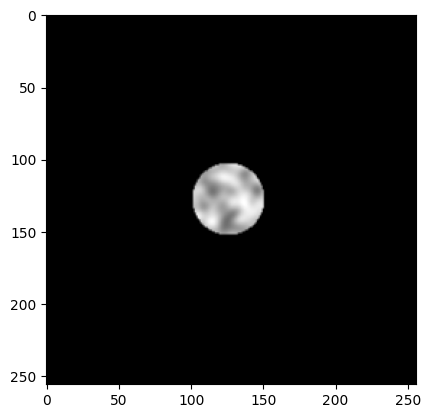

In [31]:
# Potentially add noise to the image
sigma = 0

#im1 += sigma * np.random.randn(N, M)
plt.figure(),plt.imshow(im1,cmap='gray')

In the following, we apply a translation to the image. To do that, use the applyAffineMotion function which is already pre-implemented.

In [32]:
def fracMc(ref,mvf,outofbound=20):
    
    [rows, cols] = np.shape(ref);
    
    
    
    mc_c, mc_r = np.meshgrid(np.arange(cols),np.arange(rows)) # Initial coordinates, used to infer the new coordinates
    
    mc_r_tmp = mc_r + mvf[:,:,0] # Row coordinates, after the movement
    mc_c_tmp = mc_c + mvf[:,:,1] # Column coordinates, after the movement
    
    extension = outofbound
    #ref = cv2.copyMakeBorder(ref, extension, extension, extension, extension, cv2.BORDER_REPLICATE)# Padded image
    ref = cv2.copyMakeBorder(ref, extension, extension, extension, extension, cv2.BORDER_REFLECT)# Padded image
    
    mc_r = mc_r_tmp + extension # Row coordinates, after the movement, in which we want to do the interpolation (in the padded image)
    mc_c = mc_c_tmp + extension # Column coordinates, after the movement, in which we want to do the interpolation (in the padded image)
    
    colMeshGrid, rowMeshGrid = np.meshgrid(np.arange(cols+2*extension),np.arange(rows+2*extension)) # Original coordinates, at which we know the data points
    
    
    # Put the input coordinates into the form of an array, to mach scipy format
    points = np.zeros((np.shape(ref)[0]*np.shape(ref)[1],2))
    points[:,0] = colMeshGrid.reshape(np.shape(ref)[0]*np.shape(ref)[1])
    points[:,1] = rowMeshGrid.reshape(np.shape(ref)[0]*np.shape(ref)[1])
    
    values = ref.reshape(np.shape(ref)[0]*np.shape(ref)[1])    
    
    
    # Put the coordinates in which we want ot do the interpolation into the form of an array, to mach scipy format
    points_inter = np.zeros((rows*cols,2))
    points_inter[:,0] = mc_c.reshape(rows*cols)
    points_inter[:,1] = mc_r.reshape(rows*cols)
    
    motcomp =  griddata(points, values, points_inter,'linear')
    
    motcomp = motcomp.reshape(rows,cols)

    return motcomp


def applyAffineMotion(x,b,B = np.zeros((2,2)),out = 100):
    N, M = np.shape(x)
    px, py = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1), np.arange(-(N-1)/2,(N-1)/2+1))
    
    mvfx = b[0] + B[0,0]*px + B[0,1]*py
    mvfy = b[1] + B[1,0]*px + B[1,1]*py
    
    mvf = np.zeros((np.shape(mvfx)[0],np.shape(mvfx)[1],2))
    mvf[:,:,1] = mvfx
    mvf[:,:,0] = mvfy
    
    y = fracMc(x,mvf,out)
    return y

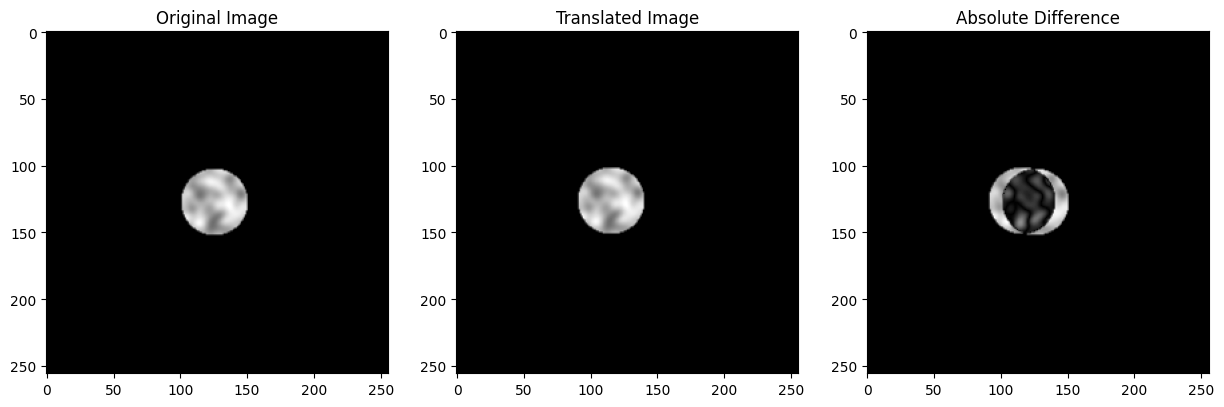

In [33]:
horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
#B = np.zeros((2,2))

im2 = applyAffineMotion(im1, b)
# Compute the absolute difference between original and translated images
abs_diff = np.abs(im1 - im2)

# Display the original and translated images along with the absolute difference
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(im1, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(im2, cmap='gray')
axes[1].set_title('Translated Image')
axes[2].imshow(abs_diff, cmap='gray')
axes[2].set_title('Absolute Difference')
plt.show()

Compute the FFT of the two images. Using the indications given in the theroretical part, describe a method with which you can find the parameters of the translation from the two FFTs.

**Answer:**

Using the ratio between the DFT's of both images we have:

$$
\frac{\hat{B}(k_x,k_y)}{\hat{A}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N}\right)
$$

where the phase is $ \phi^*(k_x, k_y) $ , since $ 2\pi $ and $ N $ are constants 

$$
\phi(k_x, k_y) = \frac{2\pi(ck_x + dk_y)}{N} \times \frac{N}{2\pi} = ck_x + dk_y
$$

Where we can find the change in $ x $ and $ y $ taking the derivatives respectively

$$
\phi_x(k_x, k_y) = c \\
\phi_y(k_x, k_y) = d
$$




In [34]:
IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)

Compute the phase of the Fourier transform.

In [35]:
def angle2D(x):
    a = np.angle(x)
    
    b1 = np.unwrap(a,axis=0)
    b2 = np.unwrap(b1,axis=1)
    b3 = np.unwrap(a,axis=0)[:,::-1]
    b4 = np.unwrap(b3,axis=1)[:,::-1]
    
    y = (b2+b4)/2./(-2.*np.pi)
    return y

In [36]:
phi = angle2D(IM1/IM2)

Display phi. Is it a linear plane and why?

## Answer
Yes, it's a linear plane because, as it was prooved before, the phase is a function that describes plane since we have two variables s.t: 

$$
\phi_x(k_x, k_y) = c \\
\phi_y(k_x, k_y) = d
$$
$$
 \to ck_x + dk_y
$$

**Answer:**

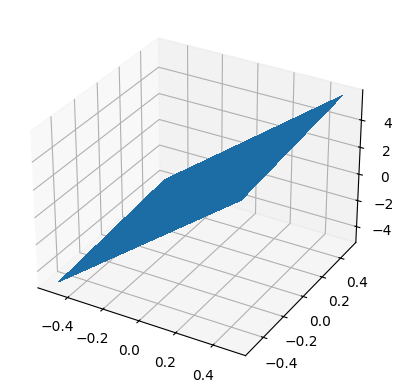

In [37]:
fx, fy = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1)/M, np.arange(-(N-1)/2,(N-1)/2+1)/N)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx, fy, phi, linewidth=0, antialiased=False)


Translation estimation: to estimate the parameters of the translation, we are now looking for the slope of the plane.

Method 1: estimate it using the median of the gradient. To do that, complete the gradient function.

In [38]:
def gradient(M,stepX=1.,stepY=1.):
# Computes the gradient of an image, over the rows and the column directions. StepY is the assumed gap between the rows and StepX is the assumed gap between the columns

    # Compute the gradient along the rows (gy) using finite differences
    gy = np.gradient(M, axis=0) / stepY
    
    # Compute the gradient along the columns (gx) using finite differences
    gx = np.gradient(M, axis=1) / stepX
    
    
    return gx,gy

In [39]:
gx, gy = gradient(phi,1/M,1/N)
GX = np.median(gx)
GY = np.median(gy)

In [40]:
print(GX)
print(GY)

10.0
1.0


Method 2: the code below computes the least Square planar approximation of phi, enabling you how to estimate the parameters of the translation. Explain how it works.

## Answer:

### Preprocessing
**Median Filtering**: The function `medianFilter` applies a median filter to the phase difference `phi`, using a window size of `2N + 1` in both the row and column directions. The `medianFilter` function pads the input array `x` with borders replicated from the edge, and then computes the median value within each window. The output `y` contains the median-filtered phase difference.

**Centering the Phase Difference**: The code subtracts the central value of the phase difference from the entire phase difference array `phi`. 

### Least Square planar approximation of phi explanation

This method is applied to fit a planar surface to the filtered phase difference. To do this, the code constructs a design matrix `A` where each row contains the gradient components `fx` and `fy` (which presumably represent the gradients along the x and y directions, respectively) reshaped into column vectors. 

$$
A = \begin{bmatrix}
k_{x_{11}} & k_{y_{11}} \\
k_{x_{12}} & k_{y_{12}} \\
\vdots     & \vdots     \\
k_{x_{MN}} & k_{y_{MN}}
\end{bmatrix}
$$

The right-hand side vector `b` contains the values of the filtered phase difference `t`. 

$$
\phi = 
\begin{bmatrix}
k_{x_{11}} & k_{y_{11}} \\
k_{x_{12}} & k_{y_{12}} \\
\vdots     & \vdots     \\
k_{x_{MN}} & k_{y_{MN}}
\end{bmatrix}

\times

\begin{bmatrix}
c \\ 
d
\end{bmatrix}

= 

\begin{bmatrix}
ck_{x_{11}} & dk_{y_{11}} \\
ck_{x_{12}} & dk_{y_{12}} \\
\vdots     & \vdots     \\
ck_{x_{MN}} & dk_{y_{MN}}
\end{bmatrix}
$$

we have the following least squares minimization problem

$$
\mathrm{x}^* = \min_\mathrm{x} ||A\mathrm{x} - \phi||_2^2 
$$

so, to find x (the estimated parameters of the translation c and drepresented by the variable `bEst`), the  solution `bEst` is computed using the pseudo-inverse of `A` (computed with `np.linalg.pinv`) multiplied by `b`.

$$
\mathrm{x}^* \approx A^{+} b  
$$


In [41]:
def medianFilter(x,N):
    z = copyMakeBorder(x, N, N, N, N, BORDER_REPLICATE)
    y = np.zeros(np.shape(x))
    
    for r in range(np.shape(x)[0]):
        for c in range(np.shape(x)[1]):
            tmp = z[r:r+2*N+1,c:c+2*N+1]
            y[r,c] = np.median(tmp)
    return y

In [42]:
phi = phi-phi[int(N/2+2), int(M/2+2)]
t = medianFilter(phi,1)
A = np.zeros((np.shape(fx)[0]*np.shape(fx)[1],2))
A[:,0] = fx.reshape(np.shape(fx)[0]*np.shape(fx)[1])
A[:,1] = fy.reshape(np.shape(fy)[0]*np.shape(fy)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
bEst = np.dot(np.linalg.pinv(A),b)

In [43]:
print(bEst)

[9.99981832 0.99999929]


**Relaunch the above code**:
- with and without noise
- with the lena image, instead of the ball image.

Each time, are you able to correctly estimate the translation? Why? Comment your results.

For the noisy images, even thoug it changes a little bit, we can still appreciate a good estimation of the values of the translation. It could be improved with some preprocessing or changing the window of the median filter

For the Lena image, the translaitons is not as well estimated as in the ball image, this is because this image is not periodic as the ball image, when we plot the graph of the phase we don't have a coherent slope

**Ball image with noise**

[-9.66666558 -0.99587101]


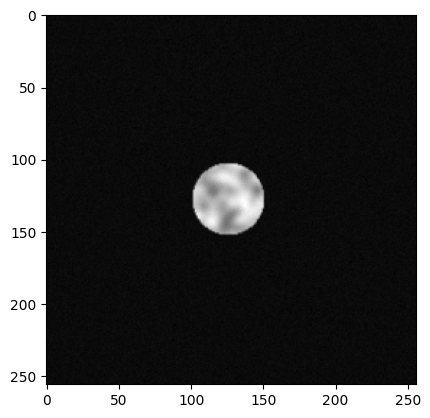

In [44]:
im1 = loadmat('ball.mat')['im1']
im1 = im1.astype('float')

N, M = np.shape(im1)

sigma = 2
im1 += sigma * np.random.randn(N, M)
plt.figure(),plt.imshow(im1,cmap='gray')

horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

im2 = applyAffineMotion(im1, b)

IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)

phi = angle2D(IM2/IM1)
fx, fy = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1)/M, np.arange(-(N-1)/2,(N-1)/2+1)/N)

phi = phi-phi[int(N/2+2), int(M/2+2)]
t = medianFilter(phi,1)
A = np.zeros((np.shape(fx)[0]*np.shape(fx)[1],2))
A[:,0] = fx.reshape(np.shape(fx)[0]*np.shape(fx)[1])
A[:,1] = fy.reshape(np.shape(fy)[0]*np.shape(fy)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
bEst = np.dot(np.linalg.pinv(A),b)

print(bEst)

**Lena image without noise**

[-7.90761829 -0.01702052]


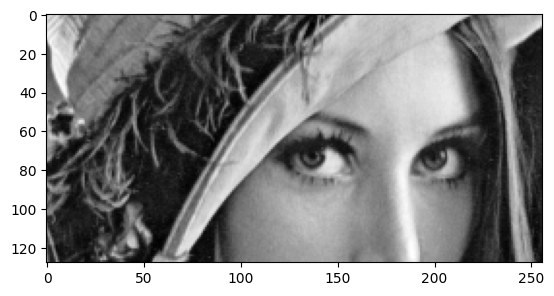

In [45]:
im1 = loadmat('lena.mat')['im1']
im1 = im1.astype('float')

N, M = np.shape(im1)

sigma = 0
#im1 += sigma * np.random.randn(N, M)
plt.figure(),plt.imshow(im1,cmap='gray')

horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

im2 = applyAffineMotion(im1, b)

IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)

phi = angle2D(IM2/IM1)


fx, fy = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1)/M, np.arange(-(N-1)/2,(N-1)/2+1)/N)

phi = phi-phi[int(N/2+2), int(M/2+2)]
t = medianFilter(phi,1)
A = np.zeros((np.shape(fx)[0]*np.shape(fx)[1],2))
A[:,0] = fx.reshape(np.shape(fx)[0]*np.shape(fx)[1])
A[:,1] = fy.reshape(np.shape(fy)[0]*np.shape(fy)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
bEst = np.dot(np.linalg.pinv(A),b)

print(bEst)

**Lena image with noise**

[-8.61362363 -0.21918747]


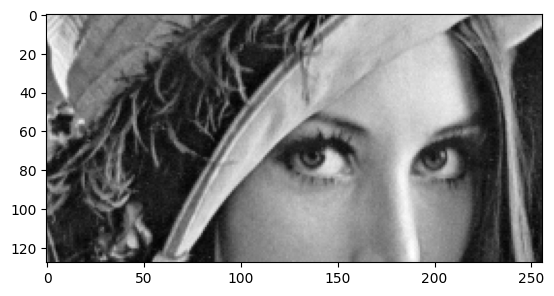

In [46]:
im1 = loadmat('lena.mat')['im1']
im1 = im1.astype('float')

N, M = np.shape(im1)

sigma = 2
im1 += sigma * np.random.randn(N, M)
plt.figure(),plt.imshow(im1,cmap='gray')

horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

im2 = applyAffineMotion(im1, b)

IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)

phi = angle2D(IM2/IM1)


fx, fy = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1)/M, np.arange(-(N-1)/2,(N-1)/2+1)/N)

phi = phi-phi[int(N/2+2), int(M/2+2)]
t = medianFilter(phi,1)
A = np.zeros((np.shape(fx)[0]*np.shape(fx)[1],2))
A[:,0] = fx.reshape(np.shape(fx)[0]*np.shape(fx)[1])
A[:,1] = fy.reshape(np.shape(fy)[0]*np.shape(fy)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
bEst = np.dot(np.linalg.pinv(A),b)

print(bEst)

# II-Indirect parametric estimation
In this last part, we will perform indirect parametric estimation. The movement vector field will be estimated by 1) block matching; 2) optic flow. **You have to reuse here the functions that you implemented during the first practical work**. Each time, you will then estimate the translation by taking the median of the estimated vector field.

Perform the experiment without and with noise (you can then take sigma = 2).

Finally, compare all the parametric estimation methods when the translation values are not integer.

### Answer

Block matching method works pretty well for both images ball and lena with both noise or without noise, but we have to adapt the regularization parameter lambda the have a better performance of this method, without the regularization even though is good, is not that accurate. Block matching method performance is more accurate (because we're taking the median, so it's less sensitive to noise).
When we wanted to make bigger displacements, we had to increase also the window size, but this means it would take more time to run the algorithm

Optical flow method is not as accurate as block matching method but still gets a good result, i had to change the parameter alpha (that reflects the influence of the smoothness term) so that it gets a better approximation.

**Non-integer case** 

**Direct parametric estimation**

For the non-integer case, the direct parametric estimation doesn't behave that well, probably because we don't have a linear phase signal as we could appreciate on the graphic of this case.

**Indirect parametric estimation**

For the non-integer case, the indirect estimation methods work well, but particularly in the implementation of block matching, we're always gonna have integer values since we're evaluating integer values due to we're moving the blocks in a discrete space (the pixels of the image), we could have a better approach with subpixel motion estimation in the non-integer case.

## Estimation with block matching

In [47]:
def computePredictor(r,c,brow,bcol,mvf,ref,cur):
    """
    compute predictor gives the median of the mvf of the blocks :
        - to the left of the current block
        - above the current block
        - upper left of the current block
        
    If such blocks do not exist due to the border effects, they are not taken into account.

    Parameters
    ----------
    See usage in the me_ssd function

    Returns
    -------
    pV : Median of the mvf of the neighboor blocks

    """
    if r < brow and c < bcol:
        pV = initVector(ref,cur)
        
    elif r < brow: # First row
        pV = mvf[r,c-bcol,:]
        
    elif c < bcol: # First column
        pV = mvf[r-brow,c,:]
        
    else: # Inside
        if c >= np.shape(mvf)[1]-bcol: # Last column
            vC = mvf[r-brow,c-bcol,:]
        
        else: # Not the last column
            vC = mvf[r-brow,c+bcol,:]
            
        vA = mvf[r,c-bcol,:]
        vB = mvf[r-brow,c,:]

        temp = np.array([vA, vB, vC]).T

        pV = np.median(temp,axis = 1)
        
    pV = pV.ravel()
    
    return pV

#%%
def initVector(ref,cur):
    """
    Performs an initialization for the first regularizers

    Parameters
    ----------
    ref : np.array
        Reference image.
    cur : np.array
        Reference image.

    Returns
    -------
    pV : np.array (vector of size 2)
        Regularizer for displacement.

    """
    
    
    step = 8
    cont = 4*step
    
    REF = gaussian_filter(ref,1.) # Unclear how to set sigma
    CUR = gaussian_filter(cur,1.)
    
    CUR = CUR[cont+1:(np.shape(CUR)[0]-cont):step,cont+1:(np.shape(CUR)[1]-cont):step]
    SSDMIN = np.inf
    
    pV=np.zeros(2)
    
    for globR in range(-cont,cont):
        for globC in range(-cont,cont):
            RR = REF[cont+1-globR:(cont-globR+np.shape(CUR)[0]*step):step, cont+1-globC:(cont-globC+np.shape(CUR)[1]*step):step]
            SSD = np.sum((RR-CUR)**2)
            
            if SSD<SSDMIN:
                SSDMIN=SSD
                pV[0]=globR
                pV[1]=globC
                
                
    return pV

#old_functions
def me_ssd(cur, ref, brow, bcol, search, lamb=0):
    """
    ME BMA full search Motion estimation
    mvf, prediction = me_ssd(cur, ref, brow, bcol, search);

    A regularization constraint can be used
    mvf = me(cur, ref, brow, bcol, search, lambda);
    In this case the function minimize SAD(v)+lambda*error(v)
    where error(v) is the difference between the candidate vector v and the
    median of its avalaible neighbors.
 
    Code inspired from the one of Marco Cagnazzo


    Parameters
    ----------
    cur : numpy array
        Current (i.e. second) frame of the video.
    ref : numpy array
        Previous (i.e. first) frame of the video.
    brow : int
        Number of rows in each block.
    bcol : int
        Number of rows in each block.
    search : int
        Search radius
    lamb : double
        Regularization parameter

    Returns
    -------
    mvf : TYPE
        DESCRIPTION.
    prediction : TYPE
        DESCRIPTION.

    """
    search_radius = search
    extension = search
    
    ref_extended = cv2.copyMakeBorder(ref, extension, extension, extension, extension, cv2.BORDER_REPLICATE) # To avoid border effect
    
    prediction = np.zeros(np.shape(cur));
    lamb *= brow*bcol;
    
    mvf = np.zeros((np.shape(cur)[0],np.shape(cur)[1],2))
    
    # Non-regularized search
    if lamb == 0.:
#Aquí vamos a primero iterar bloque por bloque de la current image
        for r in range(0, cur.shape[0], brow):
            for c in range(0, cur.shape[1], bcol):
                # current block selection
                B = cur[r:r+brow, c:c+bcol]

                # Initialization:
                costMin = float('inf')
                Rbest = np.zeros((brow, bcol))
                mv = [0, 0]
                
                # Loop on candidate displacement vectors
                for dcol in range(-search_radius, search_radius+1):
                    for drow in range(-search_radius, search_radius+1):
                        # Extract the candidate block from the extended reference frame
                        R = ref_extended[r+drow+extension:r+drow+extension+brow, c+dcol+extension:c+dcol+extension+bcol]
                        
                        # Calculate SSD
                        ssd = np.sum((B - R) ** 2)
                        
                        # Save the results if they are better than the previous ones
                        if ssd < costMin:
                            costMin = ssd
                            Rbest = R
                            mv = [drow,dcol]
                
                mvf[r:r+brow, c:c+bcol, 0] = mv[0] # Save the best row displacement field
                mvf[r:r+brow, c:c+bcol, 1] = mv[1] # Save the best column displacement field
                prediction[r:r+brow, c:c+bcol] = Rbest
    else: # Regularized search
        for r in range(0, cur.shape[0], brow):
            for c in range(0, cur.shape[1], bcol):
                # current block selection
                B = cur[r:r+brow, c:c+bcol]
    
                # Initializations
                costMin = float('inf')
                Rbest = np.zeros((brow, bcol))
                mv = [0, 0]
    
                # Neighbours : pV is the regularization vector. The regularizer must be such that the estimated displacement is not too far away from pV
                pV = computePredictor(r, c, brow, bcol, mvf, ref, cur)
    
                # Loop on candidate vectors
                for dcol in range(-search_radius, search_radius+1):
                    for drow in range(-search_radius, search_radius+1):
                        # Extract the candidate block from the extended reference frame
                        R = ref_extended[r+drow+extension:r+drow+extension+brow, c+dcol+extension:c+dcol+extension+bcol]
    
                        # Calculate regularized cost
                        cost = np.sum((B - R) ** 2) + lamb * np.sum(([drow, dcol] - pV) ** 2)
    
                        # Save the results if they are better than the previous ones
                        if cost < costMin:
                            costMin = cost
                            Rbest = R
                            mv = [drow, dcol]
    
                mvf[r:r+brow, c:c+bcol, 0] = mv[0] # Save the best row displacement field
                mvf[r:r+brow, c:c+bcol, 1] = mv[1] # Save the best column displacement field                
                    
    mvf = -mvf # For compatibility with standards
                            
    return mvf, prediction

def displayMVF(I,mvf,subsamp):
    
    row,col = np.shape(I)
    
    # Subsample dense MVF 
    vectRow = mvf[0:row:subsamp,0:col:subsamp,0]
    vectCol = mvf[0:row:subsamp,0:col:subsamp,1]
    
    # Determine vector origins
    X,Y = np.meshgrid(np.arange(0,col,subsamp),np.arange(0,row,subsamp))	
    X = X + np.floor(subsamp/2.)
    Y = Y + np.floor(subsamp/2.)
    
    # Show image
    plt.figure()
    plt.imshow(I,cmap='gray')
    plt.title('Motion Vector Field')
    plt.quiver(X, Y, vectCol, -vectRow, color='green')

    
    return

### Test with Ball Image

10.0
1.0


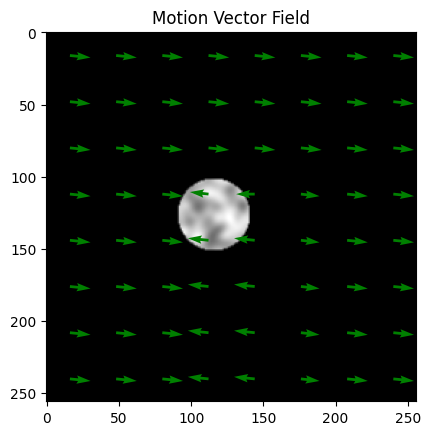

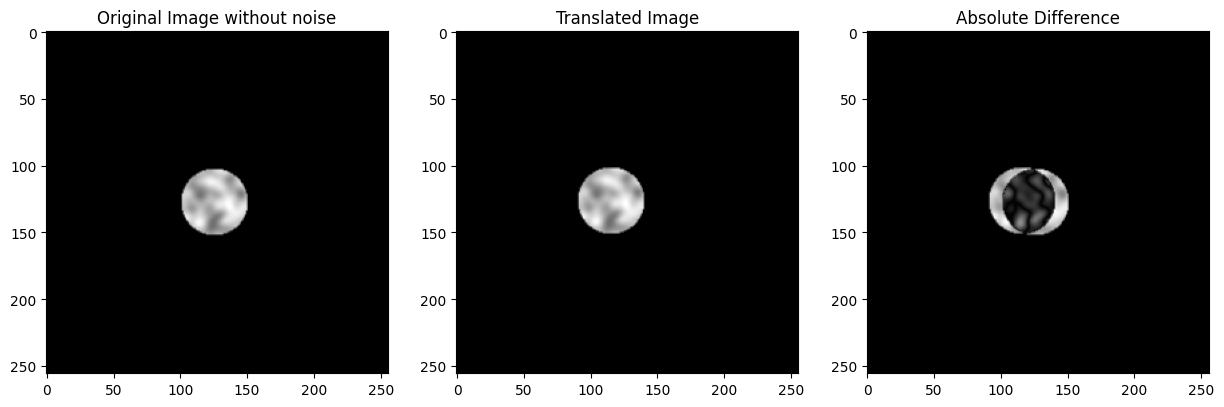

In [48]:
im1 = loadmat('ball.mat')['im1']
im1 = im1.astype('float')
N, M = np.shape(im1)

horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

im2 = applyAffineMotion(im1, b)
#without regularization (lamba=0) does not work properly
lamb = 5
mvf,prediction = me_ssd(im2,im1,32,32,10,lamb)
displayMVF(im2,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)
abs_diff = np.abs(im1 - im2)
# Display the original and translated images along with the absolute difference
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(im1, cmap='gray')
axes[0].set_title('Original Image without noise')
axes[1].imshow(im2, cmap='gray')
axes[1].set_title('Translated Image')
axes[2].imshow(abs_diff, cmap='gray')
axes[2].set_title('Absolute Difference')
plt.show()

-10.0
-1.0


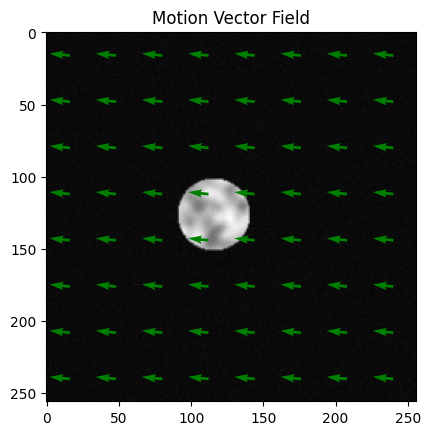

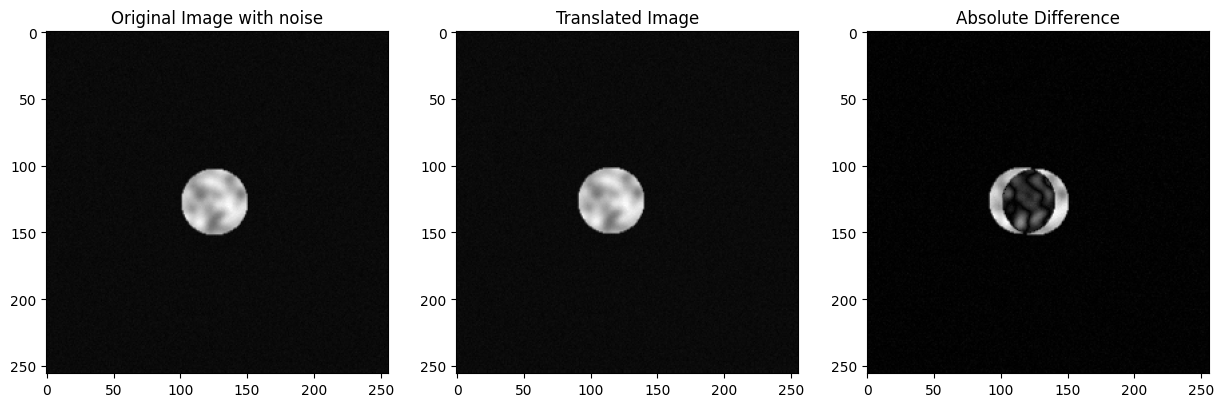

In [49]:
lamb = 0
im1 = loadmat('ball.mat')['im1']
im1 = im1.astype('float')
sigma = 2
N, M = np.shape(im1)
im1 += sigma * np.random.randn(N, M)

horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])


im2 = applyAffineMotion(im1, b)
mvf,prediction = me_ssd(im2,im1,32,32,10,lamb)
mvfn = mvf
displayMVF(im2,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)
abs_diff = np.abs(im1 - im2)
# Display the original and translated images along with the absolute difference
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(im1, cmap='gray')
axes[0].set_title('Original Image with noise')
axes[1].imshow(im2, cmap='gray')
axes[1].set_title('Translated Image')
axes[2].imshow(abs_diff, cmap='gray')
axes[2].set_title('Absolute Difference')
plt.show()

## Estimation with optic flow

In [50]:
#old_function

def computeDerivatives(im1, im2):
    kernel1D = np.expand_dims((1./12.)*np.array([-1., 8., 0., -8., 1.]),axis=1).T
    fx = convolve2d(im1,kernel1D,'same')
    fy = convolve2d(im1,kernel1D.T,'same')
    ft = convolve2d(im1, 0.25*np.ones((2,2)),'same') + convolve2d(im2, -0.25*np.ones((2,2)),'same');
    fx =-fx;
    fy=-fy;

    return fx, fy, ft

def HS(im1, im2, uInitial, vInitial, alpha=1, ite=100, blur=1.):
    """
    Horn-Schunck optical flow method.
    Horn, B.K.P., and Schunck, B.G., Determining Optical Flow, AI(17), No. 1-3, August 1981, pp. 185-203 http://dspace.mit.edu/handle/1721.1/6337
    
    [u, v] = HS(im1, im2, alpha, ite, uInitial, vInitial, displayFlow)
    
    Parameters
    ----------
    im1, im2 : np.array
        Two subsequent frames or images.
    uInitial, vInitial: np.array
        Initial values for the (u,v) flow. If well initialized, the flow would converge faster and hence would need less iterations.
    alpha : scalar
        A parameter that reflects the influence of the smoothness term.
    ite : int
        Number of iterations.

    Returns
    -------
    u,v : np.array
        Optical flow.
    """
    
    im1 = gaussian_filter(im1, blur)
    im2 = gaussian_filter(im2, blur)
    
    # Set initial value for the flow vectors
    u = uInitial.copy()
    v = vInitial.copy()
    
    # Estimate spatiotemporal derivatives
    fx, fy, ft = computeDerivatives(im1, im2)
    
    # Averaging kernel
    kernel_1 = np.array([[1./12., 1./6., 1./12.], [1./6., 0., 1./6.], [1./12., 1./6., 1./12.]])
    
    for i in range(ite):
        # Compute local averages of the flow vectors using kernel_1
        uAvg = convolve2d(u, kernel_1, 'same')
        vAvg = convolve2d(v, kernel_1, 'same')
        
        # Compute flow vectors constrained by its local average and the optical flow constraints
        u = uAvg - (fx * (fx * uAvg + fy * vAvg + ft)) / (alpha**2 + fx**2 + fy**2)
        v = vAvg - (fy * (fx * uAvg + fy * vAvg + ft)) / (alpha**2 + fx**2 + fy**2)
        
    u[np.isnan(u)] = 0
    v[np.isnan(v)] = 0
    return u, v

-9.9942722114106
-0.9998664652201491


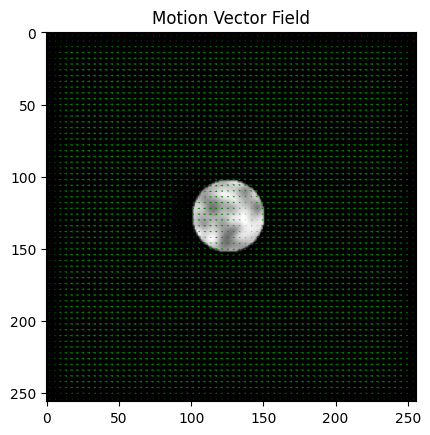

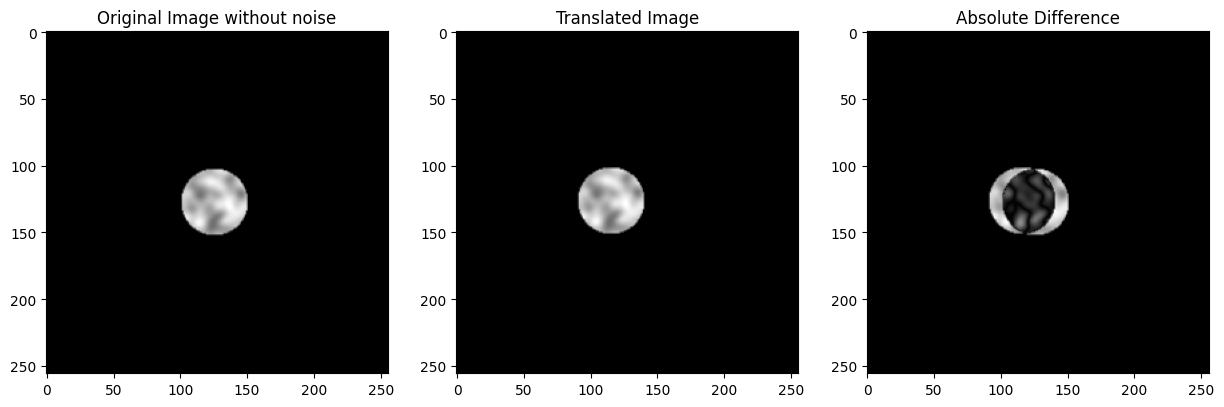

In [51]:
im1 = loadmat('ball.mat')['im1']
im1 = im1.astype('float')
N, M = np.shape(im1)

horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])


im2 = applyAffineMotion(im1, b)
alpha = 100
ite = 100
uInitial = mvf[:,:,1]
vInitial = mvf[:,:,0]
u, v = HS(im2, im1, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)
abs_diff = np.abs(im1 - im2)
# Display the original and translated images along with the absolute difference
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(im1, cmap='gray')
axes[0].set_title('Original Image without noise')
axes[1].imshow(im2, cmap='gray')
axes[1].set_title('Translated Image')
axes[2].imshow(abs_diff, cmap='gray')
axes[2].set_title('Absolute Difference')
plt.show()

-9.979402725577772
-0.9977698535047802


Text(0.5, 1.0, 'Absolute Difference')

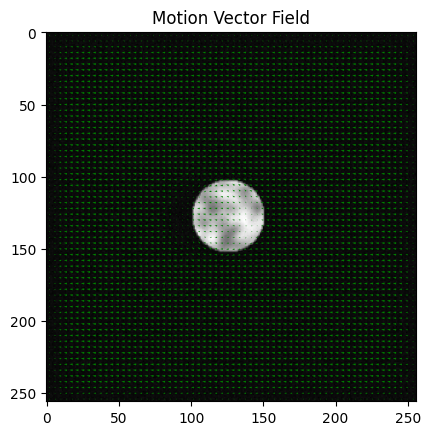

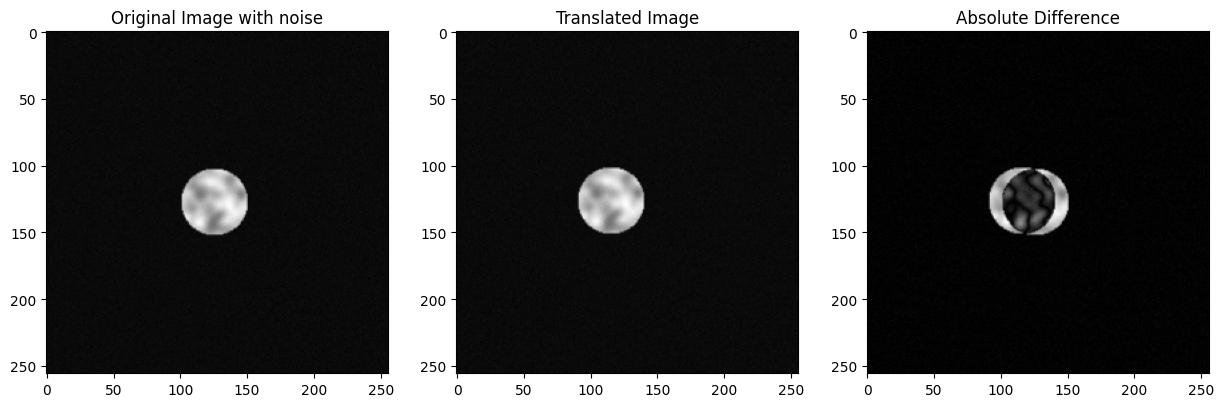

In [52]:
im1 = loadmat('ball.mat')['im1']
im1 = im1.astype('float')
sigma = 2
im1 += sigma * np.random.randn(N, M)

horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])


im2 = applyAffineMotion(im1, b)
alpha = 100
ite = 100
uInitial = mvfn[:,:,1]
vInitial = mvfn[:,:,0]
u, v = HS(im2, im1, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)
abs_diff = np.abs(im1 - im2)
# Display the original and translated images along with the absolute difference
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(im1, cmap='gray')
axes[0].set_title('Original Image with noise')
axes[1].imshow(im2, cmap='gray')
axes[1].set_title('Translated Image')
axes[2].imshow(abs_diff, cmap='gray')
axes[2].set_title('Absolute Difference')

### Test with Lena Image

### Block matching

-10.0
-1.0


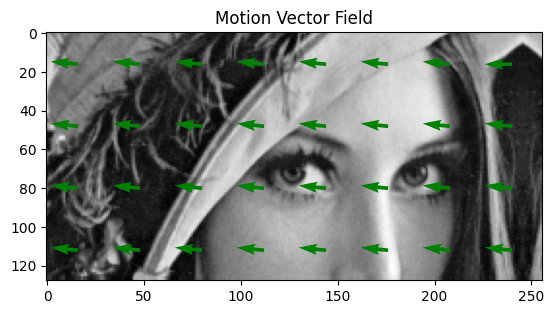

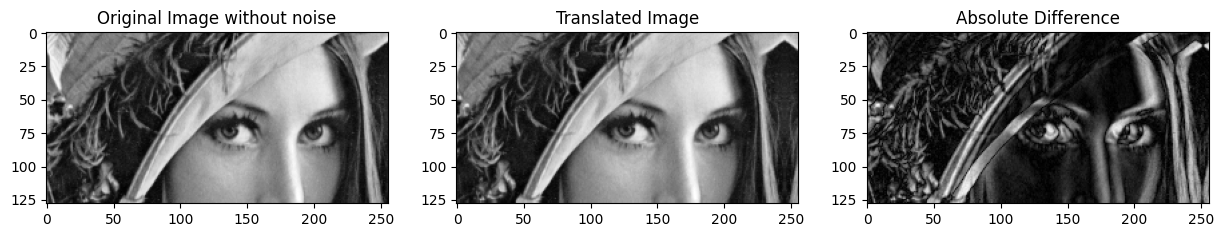

In [53]:
im1 = loadmat('lena.mat')['im1']
im1 = im1.astype('float')
N, M = np.shape(im1)

horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

im2 = applyAffineMotion(im1, b)
#without regularization (lamba=0) does not work properly
#for lena, regularization parameter must be much bigger than the one for the image ball
lamb = 0
mvf,prediction = me_ssd(im2,im1,32,32,10,lamb)
displayMVF(im2,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)
abs_diff = np.abs(im1 - im2)
# Display the original and translated images along with the absolute difference
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(im1, cmap='gray')
axes[0].set_title('Original Image without noise')
axes[1].imshow(im2, cmap='gray')
axes[1].set_title('Translated Image')
axes[2].imshow(abs_diff, cmap='gray')
axes[2].set_title('Absolute Difference')
plt.show()

-10.0
-1.0


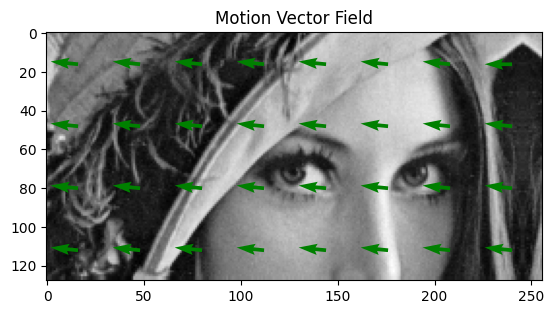

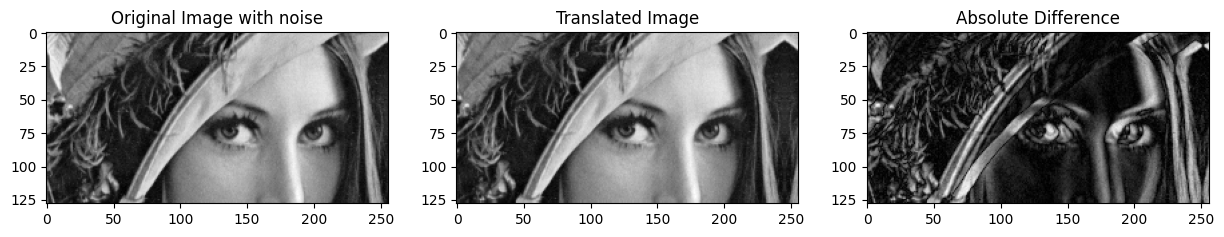

In [54]:
lamb = 0
im1 = loadmat('lena.mat')['im1']
im1 = im1.astype('float')
sigma = 2
N, M = np.shape(im1)
im1 += sigma * np.random.randn(N, M)

horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])


im2 = applyAffineMotion(im1, b)
mvf,prediction = me_ssd(im2,im1,32,32,10,lamb)
mvfn = mvf
displayMVF(im2,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)
abs_diff = np.abs(im1 - im2)
# Display the original and translated images along with the absolute difference
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(im1, cmap='gray')
axes[0].set_title('Original Image with noise')
axes[1].imshow(im2, cmap='gray')
axes[1].set_title('Translated Image')
axes[2].imshow(abs_diff, cmap='gray')
axes[2].set_title('Absolute Difference')
plt.show()

### Estimation with optic flow

-9.801628131944613
-0.9537427743584367


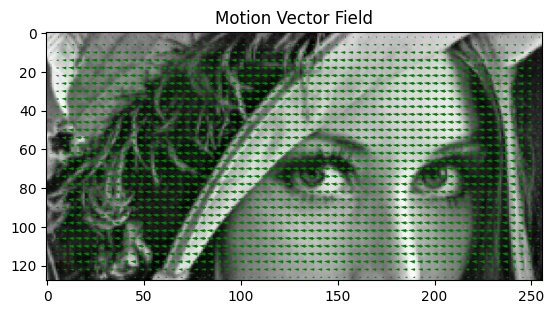

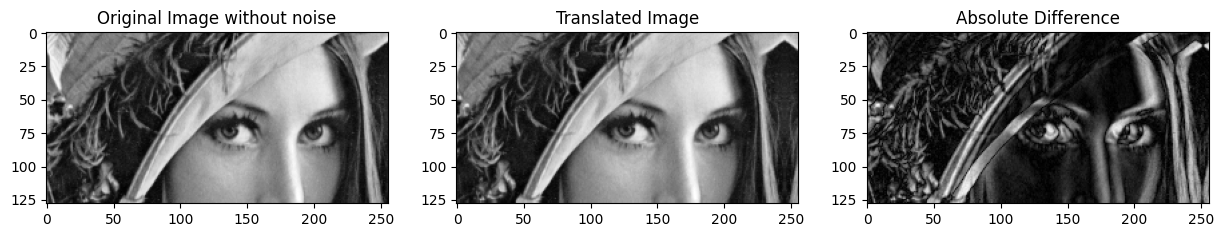

In [55]:
im1 = loadmat('lena.mat')['im1']
im1 = im1.astype('float')
N, M = np.shape(im1)

horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])


im2 = applyAffineMotion(im1, b)
alpha = 1000
ite = 100
uInitial = mvf[:,:,1]
vInitial = mvf[:,:,0]
u, v = HS(im2, im1, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)
abs_diff = np.abs(im1 - im2)
# Display the original and translated images along with the absolute difference
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(im1, cmap='gray')
axes[0].set_title('Original Image without noise')
axes[1].imshow(im2, cmap='gray')
axes[1].set_title('Translated Image')
axes[2].imshow(abs_diff, cmap='gray')
axes[2].set_title('Absolute Difference')
plt.show()

-9.801478214458172
-0.9537492209047818


Text(0.5, 1.0, 'Absolute Difference')

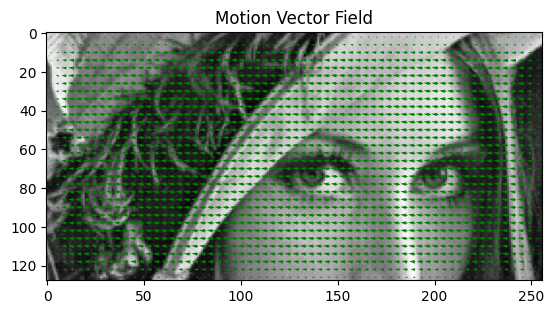

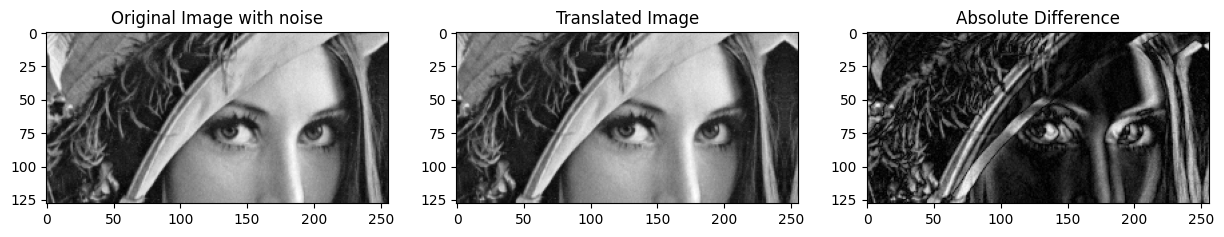

In [56]:
im1 = loadmat('lena.mat')['im1']
im1 = im1.astype('float')
sigma = 2
im1 += sigma * np.random.randn(N, M)

horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])


im2 = applyAffineMotion(im1, b)
alpha = 1000
ite = 100
uInitial = mvfn[:,:,1]
vInitial = mvfn[:,:,0]
u, v = HS(im2, im1, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)
abs_diff = np.abs(im1 - im2)
# Display the original and translated images along with the absolute difference
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(im1, cmap='gray')
axes[0].set_title('Original Image with noise')
axes[1].imshow(im2, cmap='gray')
axes[1].set_title('Translated Image')
axes[2].imshow(abs_diff, cmap='gray')
axes[2].set_title('Absolute Difference')